In [1]:
#####################################################################################################################################################################
# xView2                                                                                                                                                            #
# Copyright 2019 Carnegie Mellon University.                                                                                                                        #
# NO WARRANTY. THIS CARNEGIE MELLON UNIVERSITY AND SOFTWARE ENGINEERING INSTITUTE MATERIAL IS FURNISHED ON AN "AS-IS" BASIS. CARNEGIE MELLON UNIVERSITY MAKES NO    #
# WARRANTIES OF ANY KIND, EITHER EXPRESSED OR IMPLIED, AS TO ANY MATTER INCLUDING, BUT NOT LIMITED TO, WARRANTY OF FITNESS FOR PURPOSE OR MERCHANTABILITY,          # 
# EXCLUSIVITY, OR RESULTS OBTAINED FROM USE OF THE MATERIAL. CARNEGIE MELLON UNIVERSITY DOES NOT MAKE ANY WARRANTY OF ANY KIND WITH RESPECT TO FREEDOM FROM PATENT, # 
# TRADEMARK, OR COPYRIGHT INFRINGEMENT.                                                                                                                             #
# Released under a MIT (SEI)-style license, please see LICENSE.md or contact permission@sei.cmu.edu for full terms.                                                 #
# [DISTRIBUTION STATEMENT A] This material has been approved for public release and unlimited distribution.  Please see Copyright notice for non-US Government use  #
# and distribution.                                                                                                                                                 #
# This Software includes and/or makes use of the following Third-Party Software subject to its own license:                                                         #
# 1. SpaceNet (https://github.com/motokimura/spacenet_building_detection/blob/master/LICENSE) Copyright 2017 Motoki Kimura.                                         #
# DM19-0988                                                                                                                                                         #
#####################################################################################################################################################################

In [2]:
# To Run this notebook, start at the first cell with the license information and click run 4 times to show 
# the field blocks, then input the *full path* to the label, and image. Finally, click "Create next input", 
# you'll then see a full sized image with labels overlaid, you will also get different color labels if the
# label file as damage labels under ['features']['xy'][i]['properties']['subtype'] where i is the polygon 
# in the ['xy'] list 

In [3]:
import json 
from PIL import Image, ImageDraw
from IPython.display import display
from shapely import wkt

In [9]:
# Opening and loading polygons from label json 
path_to_label_value = '/home/abhirag/experiments_on_portugal/output_json.json'
path_to_image_value = '/home/abhirag/ONLY_PORTUGAL/images/portugal-wildfire_00000029_pre_disaster.png'

with open(path_to_label_value, 'rb') as image_json_file:
    image_json = json.load(image_json_file)

In [10]:
image_json

{'features': {'lng_lat': [],
  'xy': [{'properties': {'feature_type': 'building',
     'uid': '218dd0d5-4626-466d-aeb9-f136c38c5556'},
    'wkt': 'POLYGON ((790.0 858.0,791.0 857.0,792.0 857.0,793.0 858.0,792.0 859.0,791.0 859.0,790.0 858.0))'},
   {'properties': {'feature_type': 'building',
     'uid': 'e6b9df98-866b-4152-80f5-a77e7a240dce'},
    'wkt': 'POLYGON ((791.0 856.0,792.0 855.0,793.0 856.0,792.0 857.0,791.0 856.0))'},
   {'properties': {'feature_type': 'building',
     'uid': 'a6dc61fa-9c56-428a-a3f1-10f60239f242'},
    'wkt': 'POLYGON ((795.0 851.0,794.0 852.0,792.0 852.0,790.0 854.0,790.0 855.0,789.0 856.0,790.0 857.0,790.0 858.0,791.0 859.0,792.0 859.0,793.0 858.0,793.0 857.0,794.0 856.0,797.0 856.0,796.0 855.0,797.0 854.0,797.0 852.0,796.0 851.0,795.0 851.0))'},
   {'properties': {'feature_type': 'building',
     'uid': 'ceb07940-c19e-4f2d-9a43-2cd6af333139'},
    'wkt': 'POLYGON ((803.0 838.0,804.0 837.0,805.0 838.0,804.0 839.0,803.0 838.0))'},
   {'properties': {'featu

In [11]:
coords = image_json['features']['xy']
wkt_polygons = []

for coord in coords:
    if 'subtype' in coord['properties']:
        damage = coord['properties']['subtype']
    else:
        damage = 'no-damage'
    wkt_polygons.append((damage, coord['wkt']))
    
polygons = []

for damage, swkt in wkt_polygons:
    polygons.append((damage, wkt.loads(swkt)))

In [12]:
# Loading image
img = Image.open(path_to_image_value)

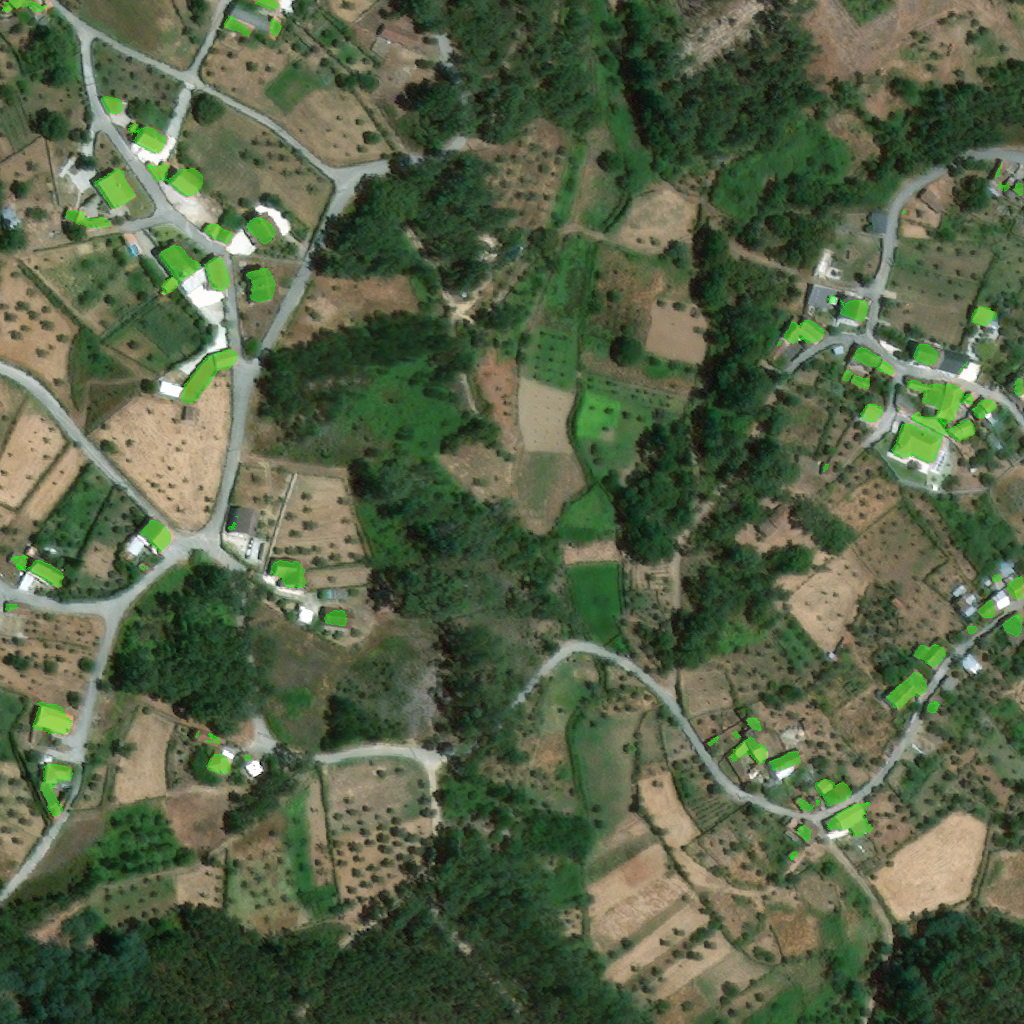

In [13]:
draw = ImageDraw.Draw(img, 'RGBA')

damage_dict = {
    "no-damage": (0, 255, 0, 100),
    "minor-damage": (0, 0, 255, 125),
    "major-damage": (255, 69, 0, 125),
    "destroyed": (255, 0, 0, 125),
    "un-classified": (255, 255, 255, 125)
}

for damage, polygon in polygons:
    x,y = polygon.exterior.coords.xy
    coords = list(zip(x,y))
    draw.polygon(coords, damage_dict[damage])

del draw

display(img)

In [20]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [21]:
img.save('localization_output__.png')